# Assignment 3

##### Course: Programming for Analytics (MSCA 31012)
##### Date: 10/29/2021
##### Author: Jacqueline Pezan
##### Dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set
##### Additional Resources: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Your task is to optimize this model so it produces better predictions. A common technique is to do 'hyper parameter optimization.' Scikit-learn has methods built in to do this (see `GridSearchCV` and `RandomSearchCV`). However, in order to learn about loops, we will do this ourselves.

Try different values for the following parameters:
- criterion: 'entropy' and 'gini'
- max_depth: betwen 1 and 10
- min_samples_split: between 2 and 5

You are welcome to try optimizations beyond these values, but the list above is the minimunm required for this assignment.

Find the best set of parameters and have your program return them, along with the score.

If you reach accuracy of 1 (perfect prediction), stop searching and show the parameters.

You are expected to write a program to solve this optimization problem. You may not cust and paste the model training code for each test (that's A LOT of cutting and pasting). You may also not manually run the code many times where you manually try different values.

### Hints

You will need to train this model and score it multiple times (once for each set of parameters you are testing). Think in terms of loops (perhaps multiple nested loops).

You will also need to keep track of all three parameters and the score. Make sure you don't accidentally overwrite variables inside the loops.

Somehow, you will need to compare the current score with the best score you have achieved so far. If the current score is better than what you have already achieved, you should update the score, and the associated variables.

At the end of your program, print the best score and the associated variables.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Load the `iris` data set
This is a  very popular data set. Due to its simplicity, it is used in many text books.

This link provides a good description: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [5]:
data_df = datasets.load_iris()

In [6]:
#print(data_df.DESCR) #uncomment this to get a quick description

In [7]:
data_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Extract input (X) and output(y) variables

In [9]:
X = data_df.data
y = data_df.target
#X
#y

Take a look at the first ten rows of X

In [10]:
X[:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Take a look at the first ten rows of y

In [11]:
y[:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Total number of observations

In [12]:
len(X)

150

### Separate the data into the part we will use for training and the part we will use for testing

The testing data is hidden during training time. Otherwise the model could just _memorize_ all the data and look up the answer when you ask for a prediction. This model will be perfect, except when you give it data it hasn't seen before.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(135, 15, 135, 15)

### Build a model to predict the flower from the measurements of its petals

Entropy index measures groups of classes that make up about 50% of the data.

In [15]:
%%time

model = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=2)
model.fit(X_train, y_train)

CPU times: user 1.32 ms, sys: 1.62 ms, total: 2.94 ms
Wall time: 5.27 ms


DecisionTreeClassifier(criterion='entropy', max_depth=1)

### Test the accuracy of your model (the closer it is to 1, the better it is)

In [16]:
model.score(X_test, y_test)

0.5333333333333333

## MODEL 1 - Gini

Gini index measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

In [17]:
%%time

model = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=2)
model.fit(X_train, y_train)

CPU times: user 813 µs, sys: 264 µs, total: 1.08 ms
Wall time: 869 µs


DecisionTreeClassifier(max_depth=1)

In [18]:
model.score(X_test, y_test)

0.5333333333333333

#### Observations: Both gini and entorpy  measure the quality of a split. Gini is intended for continuous attributes, and Entropy for attributes that occur in classes which is why gini is better suited for this model

## MODEL 2 - Max Depth

Maximum depth refers to the the length of the longest path from a root to a leaf.

#### Max Depth = 0.1

In [19]:
%%time

model = DecisionTreeClassifier(criterion='gini', max_depth=0.1, min_samples_split=2)
model.fit(X_train, y_train)

CPU times: user 738 µs, sys: 151 µs, total: 889 µs
Wall time: 786 µs


DecisionTreeClassifier(max_depth=0.1)

In [20]:
model.score(X_test, y_test)

0.13333333333333333

#### Max Depth = 10

In [21]:
%%time

model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
model.fit(X_train, y_train)

CPU times: user 1.28 ms, sys: 968 µs, total: 2.25 ms
Wall time: 1.42 ms


DecisionTreeClassifier(max_depth=10)

In [22]:
model.score(X_test, y_test)

1.0

#### Observations: Increase in max depth leads to higher model score

## MODEL 3 - Min Samples Split

min_samples_split refers to the the minimum number of samples required to split an internal node

#### Min_samples_split = 2

In [23]:
%%time

model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
model.fit(X_train, y_train)

CPU times: user 1.13 ms, sys: 784 µs, total: 1.91 ms
Wall time: 1.21 ms


DecisionTreeClassifier(max_depth=10)

In [24]:
model.score(X_test, y_test)

1.0

In [25]:
%%time

model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5)
model.fit(X_train, y_train)

CPU times: user 1.25 ms, sys: 828 µs, total: 2.08 ms
Wall time: 1.46 ms


DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [26]:
model.score(X_test, y_test)

1.0

#### Observations: This model requires a greater of samples to split the internal node. 
#### Note: Line [90] shows score of optimized model givenbasic parameters

## MODEL 4 - Optimized Model Species Prediction

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [28]:
# Reload Data
from sklearn.datasets import load_iris
data_df = datasets.load_iris()

# Rename DF
petal_df = pd.DataFrame(data= data_df.data, columns= data_df.feature_names)
petal_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
# Descriptive statistics of dataset
petal_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
# DF Summary
petal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<ipython-input-34-642f8ca08308>:3: UserWarning: ignore
  warnings.warn("ignore")
/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/jackiepezan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

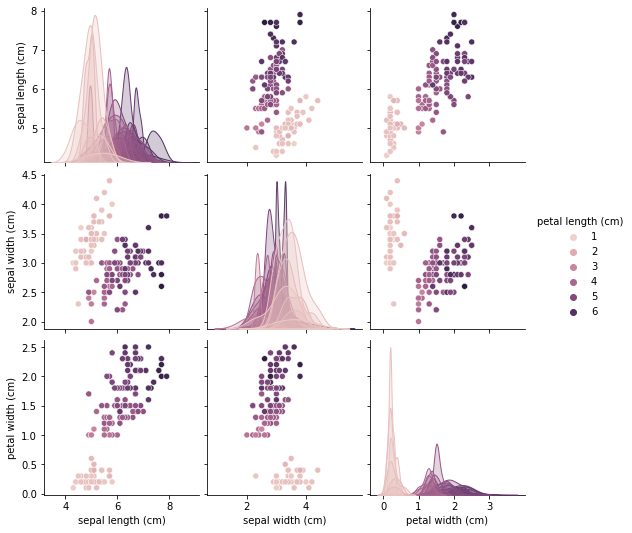

In [34]:
#Ignore warnings
import warnings
warnings.warn("ignore")

# Summary Plots
sns.pairplot(petal_df, hue= 'petal length (cm)')

In [35]:
# Assigning str value to species in DF
main_df = pd.DataFrame(data= data_df.target, columns= ['species'])
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'
main_df['species'] = main_df['species'].apply(converter)

# Combine DF using concatenate function
petal_df = pd.concat([petal_df, main_df], axis= 1)
petal_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [36]:
petal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
# Species (object - str) to float (number)
petal_df.drop('species', axis= 1, inplace= True)
main_df = pd.DataFrame(data= data_df.target, columns= ['species'])
petal_df = pd.concat([petal_df, main_df], axis= 1)

In [38]:
# New train/test variables
X= petal_df.drop(labels= ['petal length (cm)'], axis= 1)
y= petal_df['petal length (cm)']

In [39]:
# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.10)

# Dataset Results
print(f"80 % of Train Data Size : {len(X_train)} and Data Size of Training Labels : {len(y_train)}")
print()
print(f"20 % of Test Data Size : {len(X_test)} and Data Size of Testing Labels : {len(y_test)}")

80 % of Train Data Size : 135 and Data Size of Training Labels : 135

20 % of Test Data Size : 15 and Data Size of Testing Labels : 15


In [40]:
# Linear Regression
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Testing model predictions
model_predict = lr.predict(X_test)

In [41]:
# Model performance
print('Mean Squared Error =', mean_squared_error(y_test, model_predict))
print ('Model Score =', lr.score(X_test, y_test))

Mean Squared Error = 0.09937855454706045
Model Score = 0.9678843864571288


## Check Work

In [43]:
petal_df.loc[0]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
species              0.0
Name: 0, dtype: float64

In [44]:
input_values = {'sepal length (cm)' : [5.1],
    'sepal width (cm)' : [3.5],
    'petal length (cm)' : [1.4],
    'petal width (cm)' : [0.2],
    'species' : 0}
test_df = pd.DataFrame(data= input_values)
test_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [53]:
model_predict = lr.predict(X_test)
print('Predicted Petal Length (cm):', model_predict[0])
print('Actual Petal Length (cm):', 1.4)

Predicted Petal Length (cm): 1.4992462987815423
Actual Petal Length (cm): 1.4


Conclusion: There is a 0.099 cm discrepancy between values. For the example above the predicted petal lenght for an Iris Setosa flower was witin the mse of the actual value. 

Resources for final model: 
    https://www.tutorialspoint.com/python/python_if_else.html
    https://datascience.stackexchange.com/questions/20582/concatenate-dataframes-pandas
    https://www.w3schools.com/python/python_ml_linear_regression.asp
    https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
    https://seaborn.pydata.org/generated/seaborn.pairplot.html